# Maschinelles Lernen
# Aufgabenblatt 02 - Aufgabe 01
# Prof. Dr. David Spieler

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('Weekly.csv')

In [3]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
model = LogisticRegression()
X = df[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = df['Direction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
y

0       Down
1       Down
2         Up
3         Up
4         Up
5       Down
6         Up
7         Up
8         Up
9       Down
10      Down
11        Up
12        Up
13        Up
14      Down
15        Up
16      Down
17        Up
18      Down
19        Up
20        Up
21        Up
22      Down
23      Down
24      Down
25      Down
26      Down
27      Down
28        Up
29        Up
        ... 
1059      Up
1060      Up
1061    Down
1062    Down
1063      Up
1064    Down
1065      Up
1066    Down
1067      Up
1068    Down
1069    Down
1070    Down
1071      Up
1072      Up
1073      Up
1074      Up
1075    Down
1076      Up
1077      Up
1078      Up
1079      Up
1080      Up
1081    Down
1082      Up
1083    Down
1084      Up
1085      Up
1086      Up
1087      Up
1088      Up
Name: Direction, Length: 1089, dtype: object

In [6]:
y_pred = model.predict(X_test)
C = confusion_matrix(y_test, y_pred, labels=['Up', 'Down'])
C

array([[228,  83],
       [171,  63]], dtype=int64)

In [7]:
n = C[0][0] + C[0][1] + C[1][0] + C[1][1]
accuracy = (C[0][0] + C[1][1]) / n
precision = C[0][0] / (C[0][0] + C[1][0])
recall = C[0][0] / (C[0][0] + C[0][1])

print("accuracy=", accuracy)
print("precision=", precision)
print("recall=", recall)

accuracy= 0.5339449541284403
precision= 0.5714285714285714
recall= 0.7331189710610932


# Aufgabe 1.6
- Eine Genauigkeit von ca. 0.53 besagt, dass etwas mehr als jede zweite Vorhersage unabhängig davon, ob es sich um eine positive oder negative Rendite handelt korrekt ist. 
- Die Präzision von etwa 0.57 ist ein bisschen höher und bezieht sich auf den Anteil der korrekt vorhergesagten positiven Renditen. 
- Eine Trefferquote von ca. 0.73 besagt dass ca. drei von 4 positiven Renditen tatsächlich auch vorhergesagt werden.
- Im beschriebenen Fall würde man auf Kursgewinne setzen, immer genau dann, wenn das Modell für eine zu klassifizierende Woche 'UP' vorhersagt. Daher ist wichtig zu wissen, wie oft relativ gesehen das Modell in diesem Fall richtig liegt, was durch die Präzision ausgedrückt wird. Da die Präzision nur etwas besser als der Zufall (0.50) ist, wäre es wohl nicht ratsam anhand des Modells zu spekulieren.

In [8]:
simple_model = LogisticRegression()
X_simple = df[['Lag2']]
y_simple = df['Direction']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size = 0.5, random_state=0)
model.fit(X_train_s, y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

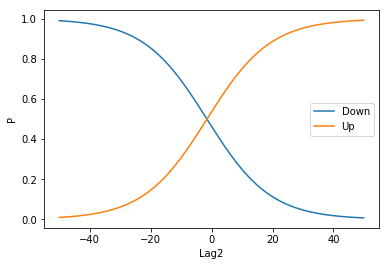

In [10]:
X_plot = np.arange(-50, 50, 0.1).reshape((-1,1))
y_plot = model.predict_proba(X_plot)
plt.plot(X_plot, y_plot)
plt.xlabel('Lag2')
plt.ylabel('P')
plt.legend(model.classes_)

In [11]:
X_plot[np.argwhere(y_plot[:,1] >= 0.5).min()]

array([-1.5])

In [16]:
for x,y in zip(X_plot, y_plot[:,1]):
    print(str(x) + " " + str(y))

[-50.] 0.009548451359311264
[-49.9] 0.00963947882466438
[-49.8] 0.009731365548518901
[-49.7] 0.009824119478590309
[-49.6] 0.009917748632979112
[-49.5] 0.010012261100734004
[-49.4] 0.010107665042418296
[-49.3] 0.010203968690679627
[-49.2] 0.01030118035082305
[-49.1] 0.010399308401387395
[-49.] 0.010498361294724892
[-48.9] 0.01059834755758412
[-48.8] 0.010699275791696215
[-48.7] 0.010801154674364388
[-48.6] 0.010903992959056594
[-48.5] 0.011007799476001558
[-48.4] 0.011112583132787993
[-48.3] 0.011218352914966999
[-48.2] 0.011325117886657712
[-48.1] 0.011432887191156168
[-48.] 0.011541670051547251
[-47.9] 0.011651475771319876
[-47.8] 0.011762313734985286
[-47.7] 0.01187419340869851
[-47.6] 0.011987124340882817
[-47.5] 0.012101116162857356
[-47.4] 0.012216178589467863
[-47.3] 0.012332321419720278
[-47.2] 0.012449554537417503
[-47.1] 0.012567887911799138
[-47.] 0.012687331598184077
[-46.9] 0.012807895738616138
[-46.8] 0.012929590562512609
[-46.7] 0.013052426387315554
[-46.6] 0.013176413619

[32.8] 0.9640992239428132
[32.9] 0.9644293348769043
[33.] 0.9647565213723069
[33.1] 0.9650808073035597
[33.2] 0.9654022163876176
[33.3] 0.965720772184184
[33.4] 0.9660364980960603
[33.5] 0.9663494173695079
[33.6] 0.9666595530946237
[33.7] 0.9669669282057318
[33.8] 0.9672715654817865
[33.9] 0.9675734875467893
[34.] 0.9678727168702178
[34.1] 0.9681692757674677
[34.2] 0.9684631864003066
[34.3] 0.9687544707773391
[34.4] 0.9690431507544833
[34.5] 0.9693292480354593
[34.6] 0.9696127841722857
[34.7] 0.96989378056579
[34.8] 0.9701722584661266
[34.9] 0.970448238973305
[35.] 0.9707217430377282
[35.1] 0.9709927914607388
[35.2] 0.9712614048951763
[35.3] 0.9715276038459398
[35.4] 0.9717914086705626
[35.5] 0.9720528395797913
[35.6] 0.9723119166381752
[35.7] 0.9725686597646626
[35.8] 0.9728230887332026
[35.9] 0.9730752231733573
[36.] 0.9733250825709167
[36.1] 0.9735726862685234
[36.2] 0.9738180534663021
[36.3] 0.9740612032224941
[36.4] 0.9743021544541002
[36.5] 0.9745409259375261
[36.6] 0.97477753630

# Aufgabe 1.9
Die Entscheidungsoberfläche ist $Lag2 = -1.5$. Die Klassifikationsregel lautet $$f(\texttt{Lag2}) = \begin{cases} \texttt{Down} & \text{wenn } \texttt{Lag2} < -1.5 \\ \texttt{Up} & \text{wenn } \texttt{Lag2} \geq -1.5\end{cases}$$